<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is GMM(Gaussian Mixture Model)?
Gaussian Mixture Model (GMM) is a probabilistic clustering algorithm that assumes the data is generated from multiple Gaussian distributions with unknown parameters. Unlike K-Means, which assigns each point to a single cluster, GMM assigns probabilities to belong to each cluster.



#How Does GMM Work?
GMM works by assuming that the dataset is a mixture of multiple Gaussian (Normal) distributions. It estimates the parameters of these distributions using the Expectation-Maximization (EM) algorithm.

##Steps in GMM:

###1. Initialize Parameters:

Define the number of clusters K.

Initialize the mean (μ), covariance (Σ), and weight (π) of each Gaussian distribution randomly.

###2. Expectation Step (E-Step):

For each data point, compute the probability that it belongs to each Gaussian cluster.

This is done using the multivariate Gaussian probability density function (PDF).

###3. Maximization Step (M-Step):

Update the parameters (mean, covariance, and weight) based on the probability assignments from the E-step.

New parameters maximize the likelihood of the observed data.

###4. Repeat Until Convergence:

The process is repeated until the parameters stabilize, meaning the Gaussian distributions best fit the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [2]:
# Generate synthetic data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)

In [3]:
# Standardize features (important for GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

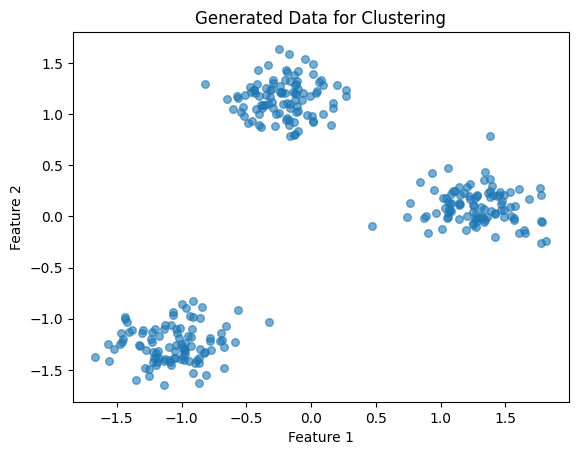

In [4]:
# Plot raw data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30, alpha=0.6)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Define and fit the GMM model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

In [6]:
# Predict cluster probabilities for each data point
labels = gmm.predict(X_scaled)
probabilities = gmm.predict_proba(X_scaled)  # Soft clustering probabilities

In [7]:
labels

array([1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 0, 1, 1])

In [8]:
probabilities

array([[1.17382982e-47, 1.00000000e+00, 2.27113543e-43],
       [1.11947241e-45, 1.00000000e+00, 4.64220225e-43],
       [1.00000000e+00, 5.86508643e-35, 4.15909052e-10],
       [3.46446455e-16, 2.79767684e-32, 1.00000000e+00],
       [1.35059150e-51, 1.00000000e+00, 5.07293241e-51],
       [9.72313852e-24, 1.06259817e-32, 1.00000000e+00],
       [1.00000000e+00, 9.88012628e-44, 4.50976698e-16],
       [3.95773114e-23, 8.49446972e-30, 1.00000000e+00],
       [1.00000000e+00, 8.64164473e-40, 5.60004292e-16],
       [1.00000000e+00, 5.94328180e-44, 9.25625378e-20],
       [1.00000000e+00, 1.50278587e-51, 7.22090375e-22],
       [2.89682406e-23, 3.39148983e-29, 1.00000000e+00],
       [9.99999999e-01, 3.88097738e-30, 1.13485004e-09],
       [1.00000000e+00, 2.07083362e-37, 2.31083223e-17],
       [6.84146069e-46, 1.00000000e+00, 1.33663053e-42],
       [1.00000000e+00, 9.80857167e-39, 4.34213054e-16],
       [1.30238763e-44, 1.00000000e+00, 1.89236112e-44],
       [2.47787684e-12, 9.44265

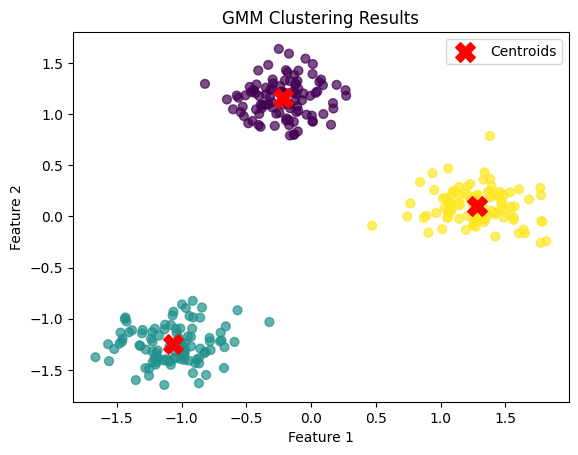

In [9]:
# Plot clusters with GMM labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=40, alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("GMM Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [10]:
print("Cluster Weights (π):", gmm.weights_)
print("Cluster Means (μ):", gmm.means_)
print("Cluster Covariances (Σ):", gmm.covariances_)


Cluster Weights (π): [0.33333333 0.33333333 0.33333333]
Cluster Means (μ): [[-0.21518875  1.15316649]
 [-1.06790185 -1.25264527]
 [ 1.2830906   0.09947878]]
Cluster Covariances (Σ): [[[ 0.04388145  0.00190179]
  [ 0.00190179  0.03192319]]

 [[ 0.06034654  0.00416807]
  [ 0.00416807  0.03178156]]

 [[ 0.06273297 -0.00428572]
  [-0.00428572  0.02748911]]]
